In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
#Reading csv file

cars = pd.read_csv('../input/cars-dealership-sales/cars_sales_data.csv', encoding='ISO-8859-1')
cars.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.0,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.9,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small


# 

## TASK 1: WHICH YEAR HAD BEST SALES?

In [3]:
results = cars.groupby('YEAR_ID').sum()
results

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,MSRP
YEAR_ID,,,,,,,,
2003,10158099,34612,83793.14,6709,3516979.54,3102,8243,101589
2004,13834764,46824,112488.10,8690,4724162.60,3916,10344,134851
2005,4967518,17631,39886.83,2855,1791486.71,654,1435,47880


###### Year 2004 had best sales

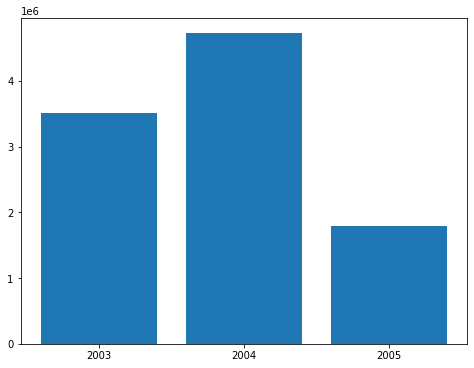

In [4]:
results = cars.groupby('YEAR_ID').sum()
years = (2003, 2004, 2005)
plt.figure(figsize=(8,6))
plt.bar(years, results['SALES'])

plt.xticks(years)

plt.show()

###### The graph shows 2004 had best sales number than 2003 but there is a shard drop in 2005

# 

## TASK 2: WHICH COUNTRY HAD THE BEST NUMBER OF SALES?

In [5]:
carsgroup = cars.groupby('COUNTRY').sum()
carsgroup

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
COUNTRY,,,,,,,,,
Australia,1898841,6246,15449.14,1181,630623.10,511,1345,370706,18493
Austria,564648,1974,4759.16,320,202062.53,153,383,110211,5662
Belgium,339687,1074,2887.31,164,108412.62,80,188,66138,3335
Canada,719223,2293,5957.05,415,224078.56,206,545,140274,6941
Denmark,644467,2197,5503.89,399,245637.15,181,444,126228,6826
Finland,944808,3192,7722.15,587,329581.91,202,485,184374,9360
France,3223513,11090,25920.87,2028,1110916.52,776,1960,629233,31330
Germany,636423,2148,5184.30,388,220472.09,198,525,124227,6281
Ireland,164059,490,1377.98,73,57756.43,30,81,32064,1710


###### lets try to graph this information to get a visual report for better understanding.

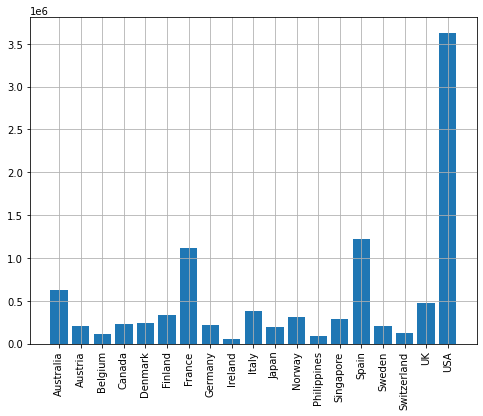

In [6]:
carsgroup = cars.groupby('COUNTRY')
sale = carsgroup.sum()['SALES']

plt.figure(figsize=(8,6))
countries = [buy for buy, df in carsgroup]
plt.bar(countries, sale)

plt.xticks(countries, rotation=90)
plt.grid()
plt.show()

###### We advice to open stores in USA since it cover a large percentage of market share. Maybe and Spain and France.

# 

## TASK 3: WHICH CITY SHOULD HAVE MORE STORE FOR CUSTOMERS REACHING?

In [7]:
carscity = cars.groupby('CITY').sum()
carscity

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
CITY,,,,,,,,,
Aaarhus,276642,882,2378.21,198,100595.55,108,270,54096,2995
Allentown,319272,1111,2662.14,174,122138.14,100,263,62126,3304
Barcelona,235596,882,1919.63,142,78411.86,90,246,46077,2003
Bergamo,489268,1650,3752.69,412,137955.72,138,366,96158,4116
Bergen,295737,973,2556.66,199,111640.28,112,311,58091,3183
...,...,...,...,...,...,...,...,...,...
Toulouse,204529,687,1701.95,99,70488.44,62,168,40070,1943
Tsawassen,266782,873,2165.00,183,74634.85,66,160,52104,2242
Vancouver,225709,703,1895.80,132,75238.92,88,242,44077,2341


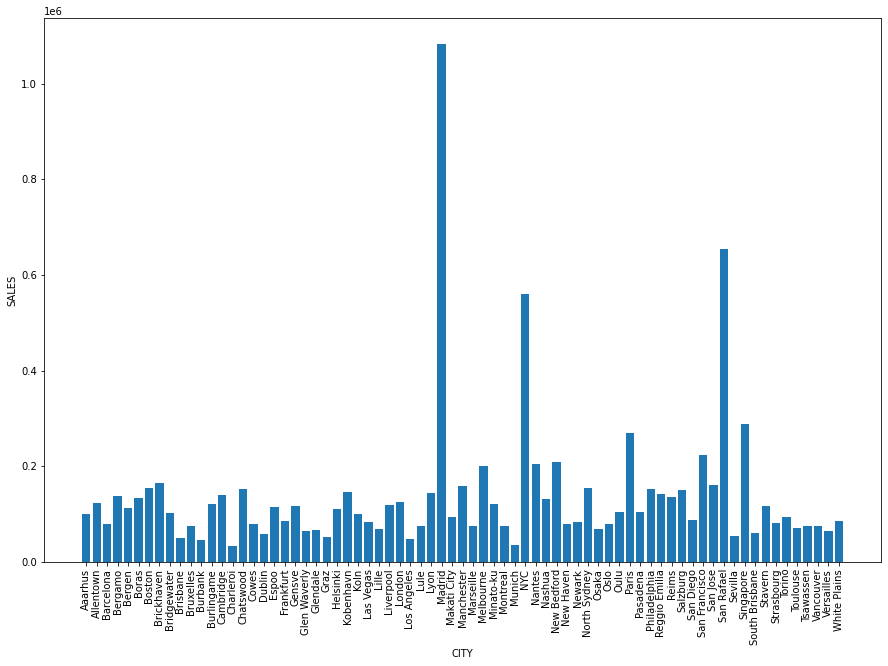

In [8]:
carscity = cars.groupby('CITY')
carssale = carscity.sum()['SALES']

cities = [city for city, df in carscity]

plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.xlabel('CITY')
plt.ylabel('SALES')

plt.bar(cities, carssale)
plt.show()

###### MADRID, SAN RAFAEL & NYC has high sales. the company has to have more stores in this cities. also for BIG city with low number of sales like PARIS, BOSTON, NEW BREDFORD has to be done more advertisement and more sales packages to attract customers

# 

## TASK 4: WHICH PRODUCT SOLD MORE.

In [9]:
carsgroup = cars.groupby('PRODUCTLINE').sum()
carsgroup

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
PRODUCTLINE,,,,,,,,,
Classic Cars,9918937,33992,84453.70,6233,3919615.66,2684,7003,1937661,115929
Motorcycles,3395505,11663,27472.19,1963,1166388.34,884,2275,663273,32130
Planes,3142556,10727,25012.72,2210,975003.57,800,2081,613199,27163
Ships,2399856,8127,19622.18,1591,714437.13,619,1622,468893,20154
Trains,789654,2712,5825.41,550,226243.47,209,549,154292,5620
Trucks and Buses,3087894,10777,26345.91,1873,1127789.84,837,2210,603143,30842
Vintage Cars,6225979,21069,47435.96,3834,1903150.84,1639,4282,1216309,52482


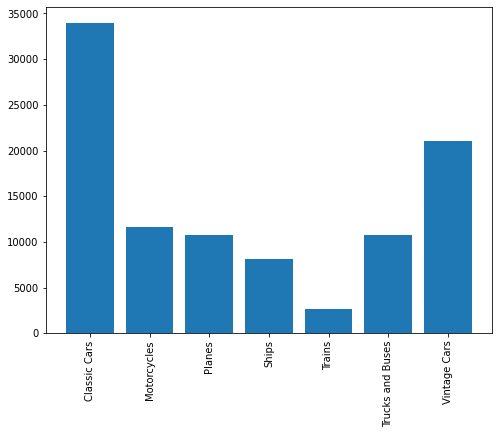

In [10]:
carsgroup = cars.groupby('PRODUCTLINE')
quantity_ordered = cars.groupby('PRODUCTLINE').sum()['QUANTITYORDERED']

products = [product for product, df in carsgroup]

plt.figure(figsize=(8,6))
plt.bar(products, quantity_ordered)

plt.xticks(products, rotation=90)

plt.show()


###### Classic cars has best number of sale because of price and availability.

# 

## TASK 5: FIND PERCENTAGE OF DEALS SIZE.

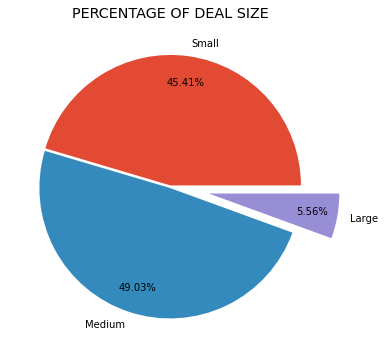

In [11]:
small = cars.loc[cars['DEALSIZE'] == 'Small'].count()[0]
medium = cars.loc[cars['DEALSIZE'] == 'Medium'].count()[0]
large = cars.loc[cars['DEALSIZE'] == 'Large'].count()[0]

plt.style.use('ggplot')
plt.figure(figsize=(8,6))
labels = ['Small', 'Medium', 'Large']
explode = [.01,.01,0.3]
plt.pie([small, medium, large], explode=explode, autopct=('%.2f%%'), labels=labels, pctdistance=0.8)
plt.title('PERCENTAGE OF DEAL SIZE')
plt.show()

###### Pie chart shows MEDIUM and SMALL deals takes a larger number with correspondent percentage (49%, 45%) but large deals only takes 6%

# 

## TASK 6: CHECK ORDER STATUS

In [12]:
cars.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.0,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.9,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small


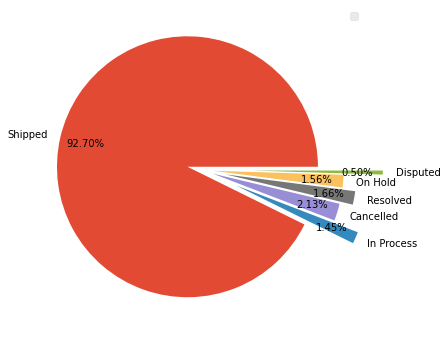

In [13]:
shipped = cars.loc[cars['STATUS'] == 'Shipped'].count()[0]
process = cars.loc[cars['STATUS'] == 'In Process'].count()[0]
cancel = cars.loc[cars['STATUS'] == 'Cancelled'].count()[0]
resolve = cars.loc[cars['STATUS'] == 'Resolved'].count()[0]
hold = cars.loc[cars['STATUS'] == 'On Hold'].count()[0]
dispute = cars.loc[cars['STATUS'] == 'Disputed'].count()[0]

status = [shipped, process, cancel, resolve, hold, dispute]

plt.style.use('ggplot')
plt.figure(figsize=(8,6))
labels = ['Shipped', 'In Process', 'Cancelled', 'Resolved', 'On Hold', 'Disputed']
explode = [.1,.3,.1,.2,.1,.4]
plt.legend(labels)
plt.pie(status, autopct=('%.2f%%'), labels=labels, explode=explode,  pctdistance=0.8)

plt.show()



###### The SHIPPED orders took great percentage which shows good dedication and service from the company.